In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from pickle import dump
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error
)

In [102]:
main_df = pd.read_csv('../data/processed/PROCESSED_DF.csv')
main_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [103]:
X = main_df.drop(columns=["Outcome"])
y = main_df["Outcome"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

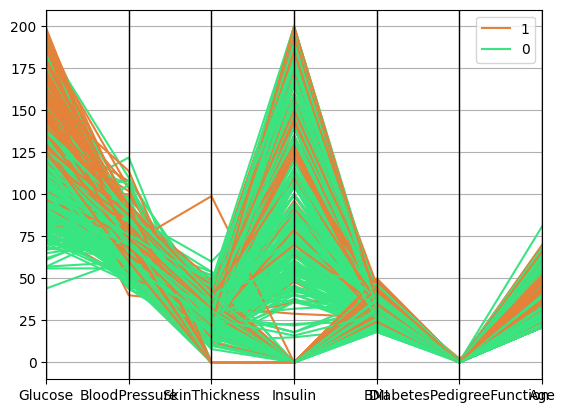

In [105]:
main_df = X
main_df['Outcome'] = y
pd.plotting.parallel_coordinates(main_df, 'Outcome', color=('#E58139', '#39E581', '#8139E5'))

<h3>Decision Tree Classifier</h3>

In [106]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [107]:
dump(model, open("../models/decision_tree_classifier_default_42.sav", "wb"))

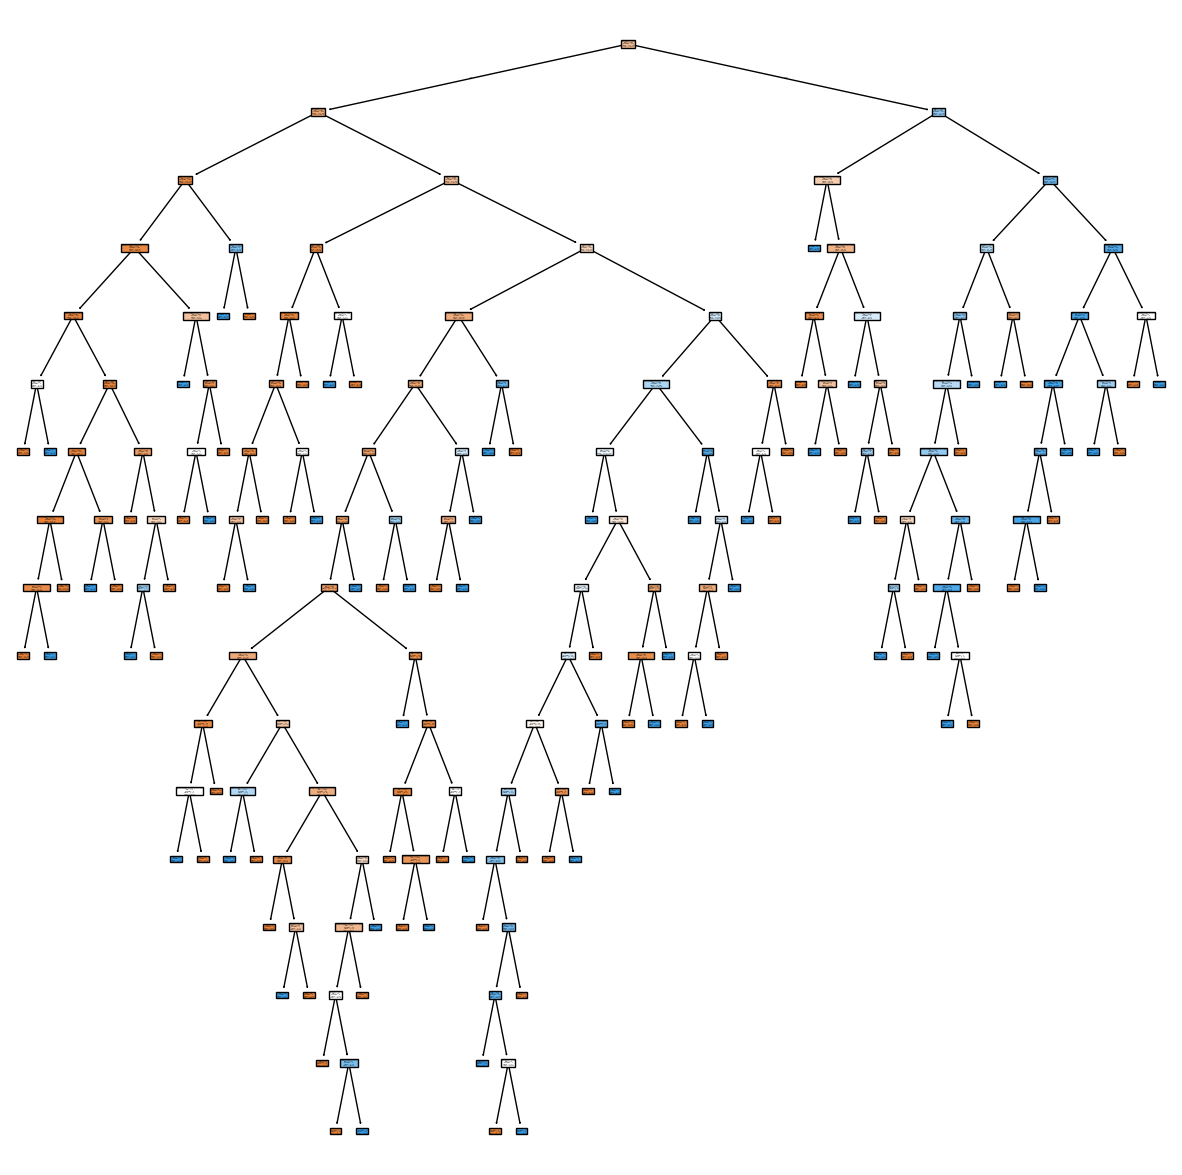

In [108]:
fig = plt.figure(figsize=(15, 15))
plot_tree(
    model, 
    feature_names=X_train.columns, 
    class_names=["Clase 0", "Clase 1"],
    filled=True
)

plt.show()

In [109]:
# Predicts
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Metrics test
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='micro')
precision_test = precision_score(y_test, y_pred_test, average='micro')
recall_test = recall_score(y_test, y_pred_test, average='micro')
squared_error_test = mean_squared_error(y_test, y_pred_test)

# Metrics train
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
squared_error_train = mean_squared_error(y_train, y_pred_train)

# Result
print(f"Accuracy (test): {accuracy_test}")
print(f"F1 Score (test): {f1_score_test}")
print(f"Precision (test): {precision_test}")
print(f"Recall (test): {recall_test}")
print(f"Mean Squared Error (test): {squared_error_test}")

print(f"\nAccuracy (train): {accuracy_train}")
print(f"F1 Score (train): {f1_score_train}")
print(f"Precision (train): {precision_train}")
print(f"Recall (train): {recall_train}")
print(f"Mean Squared Error (train): {squared_error_train}")


Accuracy (test): 0.7322834645669292
F1 Score (test): 0.7322834645669292
Precision (test): 0.7322834645669292
Recall (test): 0.7322834645669292
Mean Squared Error (test): 0.2677165354330709

Accuracy (train): 1.0
F1 Score (train): 1.0
Precision (train): 1.0
Recall (train): 1.0
Mean Squared Error (train): 0.0


In [110]:
# Optimize model
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")

best_model = grid_search.best_estimator_


Mejores parámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [111]:
# Predicts
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Metrics test
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='micro')
precision_test = precision_score(y_test, y_pred_test, average='micro')
recall_test = recall_score(y_test, y_pred_test, average='micro')
squared_error_test = mean_squared_error(y_test, y_pred_test)

# Metrics train
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
squared_error_train = mean_squared_error(y_train, y_pred_train)

# Result
print(f"Accuracy (test): {accuracy_test}")
print(f"F1 Score (test): {f1_score_test}")
print(f"Precision (test): {precision_test}")
print(f"Recall (test): {recall_test}")
print(f"Mean Squared Error (test): {squared_error_test}")

print(f"\nAccuracy (train): {accuracy_train}")
print(f"F1 Score (train): {f1_score_train}")
print(f"Precision (train): {precision_train}")
print(f"Recall (train): {recall_train}")
print(f"Mean Squared Error (train): {squared_error_train}")

Accuracy (test): 0.7401574803149606
F1 Score (test): 0.7401574803149606
Precision (test): 0.7401574803149606
Recall (test): 0.7401574803149606
Mean Squared Error (test): 0.25984251968503935

Accuracy (train): 0.8392857142857143
F1 Score (train): 0.8392857142857143
Precision (train): 0.8392857142857143
Recall (train): 0.8392857142857143
Mean Squared Error (train): 0.16071428571428573
